In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astroquery.vizier import Vizier
from astroquery.xmatch import XMatch
import astropy.units as u
plt.rc('font', **{'size':'20'}) # Adjusting default font size
plt.rcParams["figure.figsize"] = (8,8) # Setting default figure size

In [3]:
# Opening the table
catalogue = pd.read_csv('El-Badry2018.tsv',sep=';',header=50,dtype=str)

In [4]:
catalogue

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,BPmag,RPmag,plx,e_plx,chi2AL,Dist,Class,sAU,_RA.icrs,_DE.icrs
0,,deg,deg,,mag,mag,mag,mas,mas,,...,mag,mag,mas,mas,,deg,,AU,deg,deg
1,-------------------,----------------------,-----------------------,-------------,----------,----------,----------,--------------------,------------,-------------------,...,----------,----------,--------------------,-----------,-------------,-----------------------,----,---------------------,---------------,---------------
2,2872017147341819904,354.819429167895464161,33.1171185354875845519,754.796260,16.6221700,18.1604500,15.3951920,5.8843035624576174,64.3632000,2872017143044576896,...,12.5978660,11.4967340,5.8356022669144707,154.176130,721.248960,0.00456278415794366277,MSMS,2814.797453102015425,354.81435654808,+33.11908431904
3,2871944820092678272,355.378910719138616514,32.7820853250936465884,624.530400,10.2959410,10.5601120,9.8988085,4.8993526709089483,107.3047560,2871944820092678144,...,11.1493820,10.4047000,5.0650838695823506,96.634390,481.972500,0.00092922207478283916,MSMS,660.443676281253602,355.37975155383,+32.78262904874
4,2846735178834442368,0.477586484106069076,21.2030451635483494499,256.975770,17.9849640,19.5370270,16.7496380,5.8789254249736098,29.4165820,2846735178834441856,...,17.8634100,15.3409160,5.4157252987902913,42.082910,347.212070,0.00178333608760024428,MSMS,1185.439731843633353,0.47647607816,+21.20137859186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55125,2164159532858487552,319.375817706227110193,46.4142059094740275782,583.649050,14.1881620,15.2757790,13.1442860,5.7713388240667669,150.5725600,2164159532858486144,...,14.7176075,12.9379710,5.8729352274568400,321.432980,211.983840,0.00272835758022847924,MSMS,1672.433993344245664,319.37795936886,+46.41669949074
55126,2163357400456253696,313.381778369913263305,45.7194410585841595207,334.613620,18.2781090,19.8977780,16.9260790,5.7760593206555786,37.1521700,2163357404764044544,...,17.1421680,14.6613250,5.7272028824562451,112.472720,464.987270,0.00105748512055438195,MSMS,664.713663571555571,313.38002396849,+45.71889408592
55127,2167994109709179904,311.428190700059758456,48.7284155388755237936,193.059310,14.8035620,15.6026930,13.8031560,5.6700815713889243,175.5317200,2167994114009963776,...,11.5753790,10.7705680,5.6665719302736841,209.572780,496.745700,0.00113317297453398064,MSMS,719.910836831575011,311.42987031399,+48.72810698438
55128,2167991708828238848,311.382458525615561484,48.6641759874540298370,453.813720,15.0666140,16.4413030,13.9078680,9.9311336136587443,232.9464900,2167992464742483328,...,16.6459260,14.0535060,9.8333024668886644,246.855290,298.177580,0.01285394217287479969,MSMS,4705.869207765476858,311.37601802483,+48.67639969049


In [5]:
# Deleting the first two rows
catalogue = catalogue.drop([0,1])

In [6]:
# Converting columns to float, except Class and identifications
cols = catalogue.columns.difference(['ID2','ID1','Class'])
catalogue[cols] = catalogue[cols].astype(float)

In [7]:
catalogue

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,BPmag,RPmag,plx,e_plx,chi2AL,Dist,Class,sAU,_RA.icrs,_DE.icrs
2,2872017147341819904,354.819429,33.117119,754.79626,16.622170,18.160450,15.395192,5.884304,64.363200,2872017143044576896,...,12.597866,11.496734,5.835602,154.176130,721.24896,0.004563,MSMS,2814.797453,354.814357,33.119084
3,2871944820092678272,355.378911,32.782085,624.53040,10.295941,10.560112,9.898808,4.899353,107.304756,2871944820092678144,...,11.149382,10.404700,5.065084,96.634390,481.97250,0.000929,MSMS,660.443676,355.379752,32.782629
4,2846735178834442368,0.477586,21.203045,256.97577,17.984964,19.537027,16.749638,5.878925,29.416582,2846735178834441856,...,17.863410,15.340916,5.415725,42.082910,347.21207,0.001783,MSMS,1185.439732,0.476476,21.201379
5,2846485039939110272,0.998570,20.953575,203.13638,17.368803,18.844654,16.133608,5.312102,46.260380,2846483566765789056,...,8.447881,7.755854,5.343852,94.052826,330.00922,0.006595,MSMS,4443.077807,0.991647,20.953735
6,2872283740256668416,352.991804,32.356990,543.05676,10.459101,11.084879,9.731246,18.209129,344.646150,2872283263515298432,...,15.791235,13.185394,18.160763,321.213930,1503.69780,0.031210,MSMS,6186.682685,352.982874,32.327183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55125,2164159532858487552,319.375818,46.414206,583.64905,14.188162,15.275779,13.144286,5.771339,150.572560,2164159532858486144,...,14.717607,12.937971,5.872935,321.432980,211.98384,0.002728,MSMS,1672.433993,319.377959,46.416699
55126,2163357400456253696,313.381778,45.719441,334.61362,18.278109,19.897778,16.926079,5.776059,37.152170,2163357404764044544,...,17.142168,14.661325,5.727203,112.472720,464.98727,0.001057,MSMS,664.713664,313.380024,45.718894
55127,2167994109709179904,311.428191,48.728416,193.05931,14.803562,15.602693,13.803156,5.670082,175.531720,2167994114009963776,...,11.575379,10.770568,5.666572,209.572780,496.74570,0.001133,MSMS,719.910837,311.429870,48.728107
55128,2167991708828238848,311.382459,48.664176,453.81372,15.066614,16.441303,13.907868,9.931134,232.946490,2167992464742483328,...,16.645926,14.053506,9.833302,246.855290,298.17758,0.012854,MSMS,4705.869208,311.376018,48.676400


In [8]:
# Calculating absolute G magnitudes
Gmag2_abs = catalogue.Gmag2 + 5 - 5*np.log10(1000/catalogue.plx2)
Gmag1_abs = catalogue.Gmag + 5 - 5*np.log10(1000/catalogue.plx)

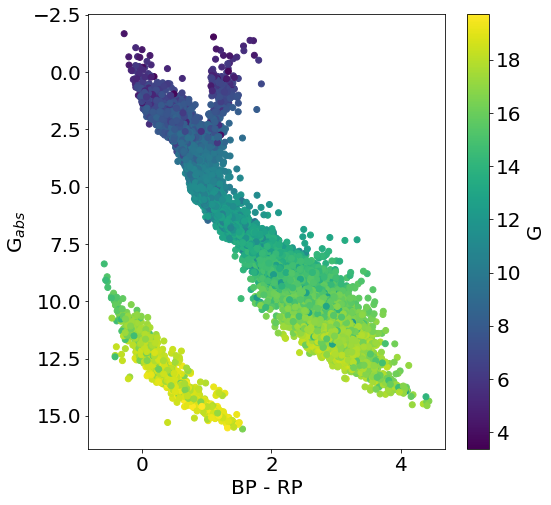

In [9]:
# Color-Magnitude diagram - Component 1
plt.scatter(catalogue.BPmag-catalogue.RPmag,Gmag1_abs,c=catalogue.Gmag,cmap='viridis')
plt.gca().invert_yaxis()
plt.colorbar(label='G')
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.show()

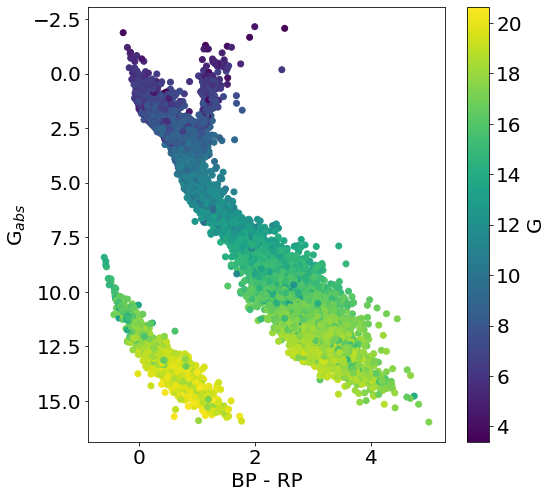

In [10]:
# Color-Magnitude diagram - Component 2
plt.scatter(catalogue.BPmag2-catalogue.RPmag2,Gmag2_abs,c=catalogue.Gmag2,cmap='viridis')
plt.colorbar(label='G')
plt.gca().invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.show()

In [11]:
# Filters the catalogue for interesting targets based on specific criteria.
mask_targets = ((catalogue['Class'] == 'MSMS') # Class 'MSMS' = Main Sequence + Main Sequence
                & (catalogue['Dist']*3600 > 20) # Distance converted to arcseconds greater than 20
                & (catalogue['Gmag'] < 10) & (catalogue['Gmag2'] < 10) # Apparent magnitude G less than 10
                & (catalogue['DE2deg'] > -75) & (catalogue['DE2deg'] < 30)) # Declination less than 30 and greater than -75 degrees

# Apply the mask to filter the catalogue
catalogue_targets = catalogue[mask_targets]

# Filter the corresponding absolute magnitudes
Gmag1_abs_targets = Gmag1_abs[mask_targets]
Gmag2_abs_targets = Gmag2_abs[mask_targets]

catalogue_targets

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,BPmag,RPmag,plx,e_plx,chi2AL,Dist,Class,sAU,_RA.icrs,_DE.icrs
1311,3116252902173428224,106.521528,3.513455,340.88890,9.635463,9.885749,9.269550,6.049291,150.59523,3116252146259181056,...,9.253230,8.719098,5.937303,119.60341,519.81920,0.009894,MSMS,5999.303644,106.531510,3.513268
1321,3116324881524878208,106.384369,3.838421,203.58144,9.705556,10.090427,9.186803,13.453661,300.83072,3116331104937277952,...,7.984714,7.340451,13.333098,210.16423,354.12530,0.113904,MSMS,30754.643654,106.409685,3.949430
1385,3101923001490347392,103.072860,-5.173728,188.19633,6.217028,6.820063,5.530465,114.296763,2458.65750,3101920046552857728,...,10.347557,8.015388,114.414844,2217.95040,440.54956,0.016341,MSMS,514.163276,103.075032,-5.190053
1447,3129424639157547264,102.551180,5.673495,310.55383,6.696761,6.871874,6.448361,11.273541,218.87665,3129425154553598720,...,9.584122,8.801588,11.279781,185.75523,183.50060,0.034594,MSMS,11040.936885,102.558405,5.707376
1581,3339560999352744960,85.048812,10.252564,264.41876,7.819768,8.040130,7.500826,12.059108,224.75291,3339565461821955712,...,8.755274,8.108447,12.120070,251.39508,291.75670,0.132698,MSMS,39415.022673,84.946551,10.339169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54158,1820739853428490880,297.178027,16.559886,891.33060,8.911342,9.106647,8.615561,5.674905,132.55196,1820739892123770368,...,8.850495,8.397291,5.630282,126.41696,942.23220,0.009860,MSMS,6304.189753,297.184813,16.567166
54372,1763720352940431232,314.974266,16.840174,242.64412,8.966272,9.379216,8.423981,21.405757,420.11234,1763718806752204800,...,6.731527,6.205309,21.335695,440.39490,585.42060,0.019687,MSMS,3321.894966,314.961867,16.824338
54503,1760477618271932672,317.753104,15.457782,409.31625,9.965147,10.394501,9.405400,13.211777,280.74963,1760471948915107200,...,9.212466,8.446420,13.238182,315.80774,497.02036,0.015714,MSMS,4273.375154,317.736733,15.457834
54587,2695882187798719616,329.358967,4.163548,267.32390,8.559989,8.836586,8.167974,10.021064,89.74148,2695882153438980864,...,7.211783,6.563993,10.098523,70.11829,139.02905,0.020889,MSMS,7446.517320,329.379049,4.157710


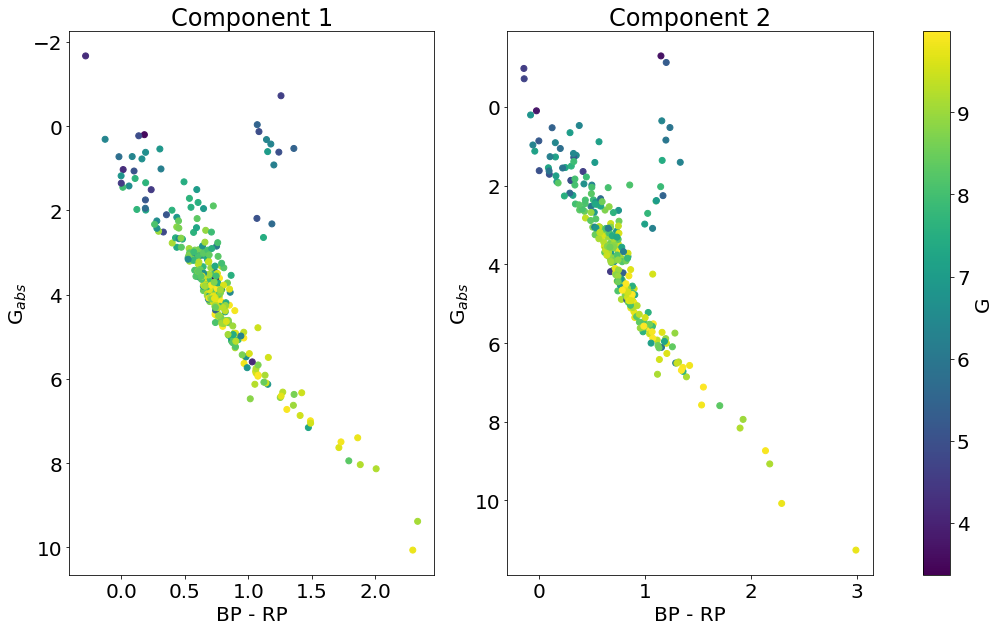

In [12]:
# Plotting Color-Magnitude diagrams for the resulting target catalogue.

# Set up the grid for the subplots
gs = gridspec.GridSpec(1, 2, wspace=0.2)
fig = plt.figure(figsize=(18,10))

# Plot Color-Magnitude diagram for Component 1
ax1 = fig.add_subplot(gs[0, 0])
sc = ax1.scatter(catalogue_targets.BPmag-catalogue_targets.RPmag,Gmag1_abs_targets,c=catalogue_targets.Gmag,
                 vmin=min(min(catalogue_targets.Gmag),min(catalogue_targets.Gmag2)),
                 vmax=min(max(catalogue_targets.Gmag),max(catalogue_targets.Gmag2)))
ax1.invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.title('Component 1')

# Plot Color-Magnitude diagram for Component 2
ax2 = fig.add_subplot(gs[0, 1])
sc = ax2.scatter(catalogue_targets.BPmag2-catalogue_targets.RPmag2,Gmag2_abs_targets,c=catalogue_targets.Gmag2,
                vmin=min(min(catalogue_targets.Gmag),min(catalogue_targets.Gmag2)),
                vmax=min(max(catalogue_targets.Gmag),max(catalogue_targets.Gmag2)))
ax2.invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.title('Component 2')

# Add a colorbar shared between the subplots
cbar = plt.colorbar(sc,ax=[ax1,ax2])
cbar.set_label('G')

plt.show()

In [13]:
# Saving the filtered target catalogue to a CSV file.
catalogue_targets.to_csv('catalogue_targets.csv')

In [14]:
# Matching the local target catalogue with Gaia DR3 (online) using component 2.
table = XMatch.query(cat1=open('catalogue_targets.csv'),
                    cat2='vizier:I/355/gaiadr3',
                    max_distance=5*u.arcsec, # Maximum distance for cross-matching
                    colRA1='RA2deg', # Column name for RA in the local catalogue
                    colDec1='DE2deg') # Column name for Dec in the local catalogue

In [15]:
# Convert the Astropy Table to a pandas DataFrame
table = table.to_pandas()

# Sort the DataFrame by angular distance to prioritize closest matches
table = table.sort_values('angDist') 

# Remove duplicate entries based on the specified column, keeping the first occurrence
table = table.drop_duplicates(subset='col1',keep='first')

# Sort the DataFrame by the unique column for better organization
table = table.sort_values('col1') 

In [16]:
# List of column names to be kept in the resulting DataFrame - not all!
tokeep = ['Teff','b_Teff','B_Teff','logg','b_logg','B_logg','[Fe/H]','b_[Fe/H]','B_[Fe/H]','Dist_2','b_Dist','B_Dist','RUWE']

# Resulting Dataframe:
table2 = table[tokeep]

In [17]:
# Renames the columns of the DataFrame by appending the suffix '_2' - component 2
table2.columns = [str(col) + '_2' for col in table2.columns]

In [18]:
# Adding the component 2 parameters to the final catalogue by joining the two DataFrames
final_table = catalogue_targets.join(table2.set_index(catalogue_targets.index))

In [19]:
# Matching the local target catalogue with Gaia DR3 (online) using component 1.
table = XMatch.query(cat1=open('catalogue_targets.csv'),
                    cat2='vizier:I/355/gaiadr3',
                    max_distance=5*u.arcsec, # Maximum distance for cross-matching
                    colRA1='RA_ICRS', # Column name for RA in the local catalogue
                    colDec1='DE_ICRS') # Column name for Dec in the local catalogue

In [20]:
# Convert the Astropy Table to a pandas DataFrame
table = table.to_pandas()

# Sort the DataFrame by angular distance to prioritize closest matches
table = table.sort_values('angDist') 

# Remove duplicate entries based on the specified column, keeping the first occurrence
table = table.drop_duplicates(subset='col1',keep='first')

# Sort the DataFrame by the unique column for better organization
table = table.sort_values('col1') 

In [21]:
# List of column names to be kept in the resulting DataFrame - not all!
tokeep = ['Teff','b_Teff','B_Teff','logg','b_logg','B_logg','[Fe/H]','b_[Fe/H]','B_[Fe/H]','Dist_2','b_Dist','B_Dist','RUWE']

# Resulting Dataframe
table2 = table[tokeep]

In [22]:
# Renames the columns of the DataFrame by appending the suffix '_1' - component 1
table2.columns = [str(col) + '_1' for col in table2.columns]

In [23]:
# Adding the component 1 parameters to the final catalogue by joining the two DataFrames
final_table = final_table.join(table2.set_index(catalogue_targets.index))

In [24]:
final_table

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,logg_1,b_logg_1,B_logg_1,[Fe/H]_1,b_[Fe/H]_1,B_[Fe/H]_1,Dist_2_1,b_Dist_1,B_Dist_1,RUWE_1
1311,3116252902173428224,106.521528,3.513455,340.88890,9.635463,9.885749,9.269550,6.049291,150.59523,3116252146259181056,...,4.1330,4.1291,4.1380,-0.1447,-0.1590,-0.1285,164.7009,164.0677,165.3512,1.200
1321,3116324881524878208,106.384369,3.838421,203.58144,9.705556,10.090427,9.186803,13.453661,300.83072,3116331104937277952,...,4.1152,4.1138,4.1164,-0.9019,-0.9139,-0.8889,73.8001,73.6575,73.9491,1.062
1385,3101923001490347392,103.072860,-5.173728,188.19633,6.217028,6.820063,5.530465,114.296763,2458.65750,3101920046552857728,...,4.3432,4.1617,4.5860,-0.6115,-0.8245,-0.3374,8.7448,8.7143,8.7663,1.151
1447,3129424639157547264,102.551180,5.673495,310.55383,6.696761,6.871874,6.448361,11.273541,218.87665,3129425154553598720,...,4.3835,4.3711,4.3972,-0.0911,-0.1127,-0.0664,88.0572,87.9361,88.1895,0.951
1581,3339560999352744960,85.048812,10.252564,264.41876,7.819768,8.040130,7.500826,12.059108,224.75291,3339565461821955712,...,4.2651,4.2634,4.2669,-0.3888,-0.3944,-0.3823,81.7857,81.6417,81.9435,1.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54158,1820739853428490880,297.178027,16.559886,891.33060,8.911342,9.106647,8.615561,5.674905,132.55196,1820739892123770368,...,4.0759,4.0729,4.0791,0.0685,0.0606,0.0754,181.6887,181.0817,182.3435,0.913
54372,1763720352940431232,314.974266,16.840174,242.64412,8.966272,9.379216,8.423981,21.405757,420.11234,1763718806752204800,...,4.0836,4.0815,4.0859,-0.8282,-0.8404,-0.8172,46.6641,46.6096,46.7261,1.028
54503,1760477618271932672,317.753104,15.457782,409.31625,9.965147,10.394501,9.405400,13.211777,280.74963,1760471948915107200,...,4.3263,4.3244,4.3284,-0.3095,-0.3159,-0.3046,75.0242,74.9099,75.1340,1.008
54587,2695882187798719616,329.358967,4.163548,267.32390,8.559989,8.836586,8.167974,10.021064,89.74148,2695882153438980864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.096


In [25]:
# Catalogue columns
final_table.columns

Index(['ID2', 'RA2deg', 'DE2deg', 'chi2AL2', 'Gmag2', 'BPmag2', 'RPmag2',
       'plx2', 'e_plx2', 'ID1', 'RA_ICRS', 'DE_ICRS', 'Gmag', 'BPmag', 'RPmag',
       'plx', 'e_plx', 'chi2AL', 'Dist', 'Class', 'sAU', '_RA.icrs',
       '_DE.icrs', 'Teff_2', 'b_Teff_2', 'B_Teff_2', 'logg_2', 'b_logg_2',
       'B_logg_2', '[Fe/H]_2', 'b_[Fe/H]_2', 'B_[Fe/H]_2', 'Dist_2_2',
       'b_Dist_2', 'B_Dist_2', 'RUWE_2', 'Teff_1', 'b_Teff_1', 'B_Teff_1',
       'logg_1', 'b_logg_1', 'B_logg_1', '[Fe/H]_1', 'b_[Fe/H]_1',
       'B_[Fe/H]_1', 'Dist_2_1', 'b_Dist_1', 'B_Dist_1', 'RUWE_1'],
      dtype='object')

In [26]:
# Filters the final table to find the best pairs based on a logg threshold
mask_pairs = (abs(final_table['logg_1']-final_table['logg_2']) > 0.4) # Threshold value

# Filtered DataFrame
final_selection = final_table[mask_pairs]

In [27]:
final_selection

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,logg_1,b_logg_1,B_logg_1,[Fe/H]_1,b_[Fe/H]_1,B_[Fe/H]_1,Dist_2_1,b_Dist_1,B_Dist_1,RUWE_1
1321,3116324881524878208,106.384369,3.838421,203.58144,9.705556,10.090427,9.186803,13.453661,300.830720,3116331104937277952,...,4.1152,4.1138,4.1164,-0.9019,-0.9139,-0.8889,73.8001,73.6575,73.9491,1.062
1447,3129424639157547264,102.551180,5.673495,310.55383,6.696761,6.871874,6.448361,11.273541,218.876650,3129425154553598720,...,4.3835,4.3711,4.3972,-0.0911,-0.1127,-0.0664,88.0572,87.9361,88.1895,0.951
2519,4837897414719047936,64.844636,-44.276394,379.23227,8.531971,8.833313,8.111717,13.204799,417.296000,4837896143408729216,...,2.5818,2.5718,2.5935,-0.0805,-0.0872,-0.0753,79.8774,78.9107,80.7456,1.129
2897,4375738420908692992,264.785629,2.027952,194.08188,5.958270,6.508751,5.311427,9.486956,152.054630,4376114556963824384,...,3.9491,3.9428,3.9521,-0.8645,-0.8789,-0.8435,103.7659,103.3406,104.6733,1.048
3377,3952692457305436800,187.582608,21.948099,293.78310,7.454218,7.980921,6.818715,6.041723,124.524010,3952693281939158144,...,4.2232,4.2209,4.2256,-0.5756,-0.5866,-0.5633,165.6130,164.9762,166.1761,1.265
7556,3053492881541639552,113.029784,-8.884609,382.59976,9.864023,10.597213,9.062839,34.828859,893.129460,3053492881541641600,...,4.0686,4.0669,4.0717,-1.1191,-1.1438,-1.0809,28.6291,28.5766,28.6664,0.966
9967,53896518103817344,61.304927,23.798076,777.90380,9.973414,10.330794,9.483056,9.436661,158.679370,53896621183031552,...,4.0424,4.0402,4.0447,-0.3118,-0.3262,-0.2971,104.7996,104.4779,105.1640,0.985
10070,43335537119008896,55.939232,16.665933,363.48910,9.917213,11.038033,8.900257,58.007039,1269.046800,43335880716390784,...,4.0190,4.0182,4.0248,-1.4340,-1.4351,-1.4259,17.2021,17.1914,17.2191,1.036
10614,2908912737481891968,85.323003,-26.353155,495.66083,9.183044,9.506899,8.729838,13.849119,462.894200,2908912737481891328,...,4.0178,3.9962,4.0651,-1.2073,-1.5273,-1.1135,72.8626,66.5192,75.6877,8.300
11774,4822499299831074560,80.577029,-35.297483,889.35100,8.380597,8.540274,7.962350,8.995345,182.263020,4822499677788196224,...,4.4438,4.4342,4.4492,-0.2356,-0.2796,-0.2162,110.3983,110.2048,110.6749,0.986


In [28]:
# Calculating the absolute G magnitudes for component 1 and component 2
Gmag2_abs = final_selection.Gmag2 + 5 - 5*np.log10(1000/final_selection.plx2)
Gmag1_abs = final_selection.Gmag + 5 - 5*np.log10(1000/final_selection.plx)

# Adding calculated absolute G magnitudes to the final selection DataFrame.
final_selection = final_selection.assign(Gmag2_abs=pd.Series(Gmag2_abs).values)
final_selection = final_selection.assign(Gmag1_abs=pd.Series(Gmag1_abs).values)

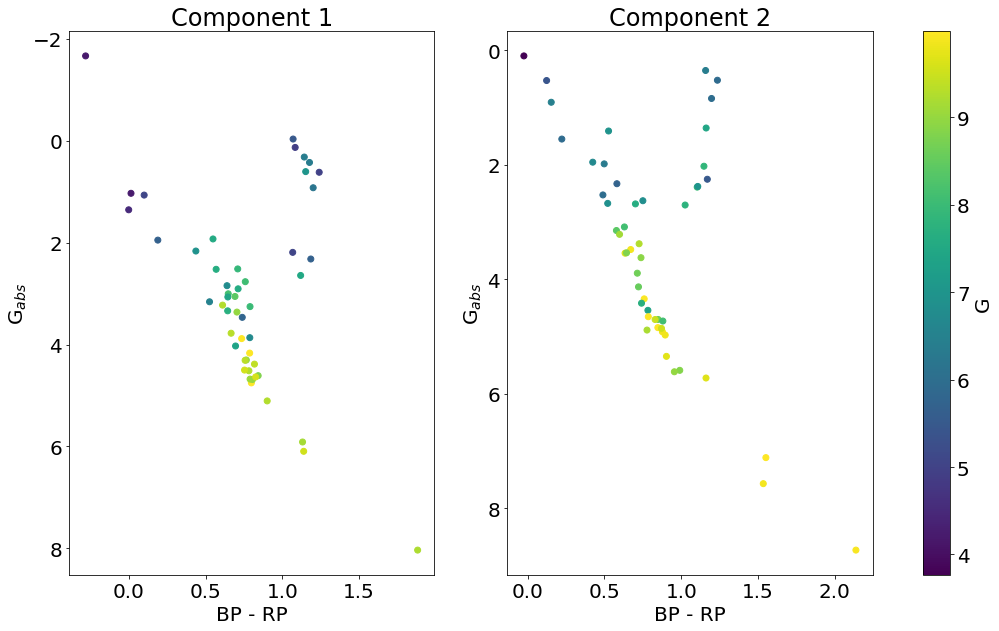

In [29]:
# Plotting Color-Magnitude diagrams for the final selection.

# Set up the grid for the subplots
gs = gridspec.GridSpec(1, 2, wspace=0.2)
fig = plt.figure(figsize=(18,10))

# Plot Color-Magnitude diagram for Component 1
ax1 = fig.add_subplot(gs[0, 0])
sc = ax1.scatter(final_selection.BPmag-final_selection.RPmag,final_selection.Gmag1_abs,c=final_selection.Gmag,
                 vmin=min(min(final_selection.Gmag),min(final_selection.Gmag2)),
                 vmax=min(max(final_selection.Gmag),max(final_selection.Gmag2)))
ax1.invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.title('Component 1')

# Plot Color-Magnitude diagram for Component 2
ax2 = fig.add_subplot(gs[0, 1])
sc = ax2.scatter(final_selection.BPmag2-final_selection.RPmag2,final_selection.Gmag2_abs,c=final_selection.Gmag2,
                vmin=min(min(final_selection.Gmag),min(final_selection.Gmag2)),
                vmax=min(max(final_selection.Gmag),max(final_selection.Gmag2)))
ax2.invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.title('Component 2')

# Add a colorbar shared between the subplots
cbar = plt.colorbar(sc,ax=[ax1,ax2])
cbar.set_label('G')

plt.show()

In [30]:
# Calculating the V magnitude based on G magnitude and BP-RP color, following the Gaia photometric relationships
def V(G,BP_RP):
    dif = BP_RP
    return(G+0.01760 + 0.006860*dif + 0.1732*dif**2)

# Calculating V magnitudes
V2 = V(final_selection.Gmag2,final_selection.BPmag2-final_selection.RPmag2)
V1 = V(final_selection.Gmag,final_selection.BPmag-final_selection.RPmag)

# Adding V magnitudes to the DataFrame
final_selection = final_selection.assign(V2=pd.Series(V2).values)
final_selection = final_selection.assign(V1=pd.Series(V1).values)

In [31]:
# Calculating absolute V magnitudes
V2_abs = final_selection.V2 + 5 - 5*np.log10(1000/final_selection.plx2)
V1_abs = final_selection.V1 + 5 - 5*np.log10(1000/final_selection.plx)

# Adding absolute V magnitudes to the DataFrame
final_selection = final_selection.assign(V2_abs=pd.Series(V2_abs).values)
final_selection = final_selection.assign(V1_abs=pd.Series(V1_abs).values)

In [32]:
# Calculating the bolometric correction using the Torres et al. (2010) relation.

def bc_torres(teff):
    if np.log10(teff) < 3.70:
        a = -0.190537291496456*10**5
        b = 0.155144866764412*10**5
        c = -0.421278819301717*10**4
        d = 0.381476328422343*10**3
        e = 0
        f = 0
        
    elif (np.log10(teff) > 3.70) and (np.log10(teff) < 3.90):
        a = -0.370510203809015*10**5
        b =  0.385672629965804*10**5
        c = -0.150651486316025*10**5
        d =  0.261724637119416*10**4
        e = -0.170623810323864*10**3
        f = 0
        
    elif np.log10(teff) > 3.90:
        a = -0.118115450538963*10**6
        b = 0.137145973583929*10**6
        c = -0.636233812100225*10**5
        d = 0.147412923562646*10**5
        e = -0.170587278406872*10**4
        f = 0.788731721804990*10**2
    
    bc = a + b*(np.log10(teff)) + c*(np.log10(teff)**2) + d*(np.log10(teff)**3) + e*(np.log10(teff)**4) + f*(np.log10(teff)**5)
    return bc

# Calculating the bolometric correction
BC1 = np.array([bc_torres(teff) for teff in final_selection.Teff_1])
BC2 = np.array([bc_torres(teff) for teff in final_selection.Teff_2])

# Adding bolometric corrections to the DataFrame
final_selection = final_selection.assign(BC2=pd.Series(BC2).values)
final_selection = final_selection.assign(BC1=pd.Series(BC1).values)

In [33]:
# Calculating the bolometric magnitudes
mbol1 = final_selection.V1_abs + final_selection.BC1
mbol2 = final_selection.V2_abs + final_selection.BC2

# Adding to the DataFrame
final_selection = final_selection.assign(mbol2=pd.Series(mbol2).values)
final_selection = final_selection.assign(mbol1=pd.Series(mbol1).values)

In [34]:
# Calculating stellar luminosities
lum1 = 10**(0.4*(4.73-mbol1))
lum2 = 10**(0.4*(4.73-mbol2))

# Adding to the DataFrame
final_selection = final_selection.assign(lum2=pd.Series(lum2).values)
final_selection = final_selection.assign(lum1=pd.Series(lum1).values)

In [35]:
final_selection

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,V2,V1,V2_abs,V1_abs,BC2,BC1,mbol2,mbol1,lum2,lum1
1321,3116324881524878208,106.384369,3.838421,203.58144,9.705556,10.090427,9.186803,13.453661,300.830720,3116331104937277952,...,9.870779,7.808183,5.514981,3.432838,-0.113421,-0.014602,5.401560,3.418236,0.538736,3.347385
1447,3129424639157547264,102.551180,5.673495,310.55383,6.696761,6.871874,6.448361,11.273541,218.876650,3129425154553598720,...,6.748332,9.383393,2.008634,4.644896,0.033014,-0.063917,2.041648,4.580979,11.894351,1.147118
2519,4837897414719047936,64.844636,-44.276394,379.23227,8.531971,8.833313,8.111717,13.204799,417.296000,4837896143408729216,...,8.644707,5.275168,4.248365,0.911495,-0.044818,-0.362007,4.203547,0.549487,1.623981,47.011599
2897,4375738420908692992,264.785629,2.027952,194.08188,5.958270,6.508751,5.311427,9.486956,152.054630,4376114556963824384,...,6.232380,7.696988,1.118015,2.601405,-0.162093,0.022621,0.955922,2.624026,32.331906,6.956482
3377,3952692457305436800,187.582608,21.948099,293.78310,7.454218,7.980921,6.818715,6.041723,124.524010,3952693281939158144,...,7.713736,10.114074,1.619540,4.000252,-0.389445,-0.051833,1.230095,3.948420,25.116676,2.054150
7556,3053492881541639552,113.029784,-8.884609,382.59976,9.864023,10.597213,9.062839,34.828859,893.129460,3053492881541641600,...,10.299914,5.876783,8.009610,3.584303,-0.984581,-0.061880,7.025029,3.522424,0.120778,3.041099
9967,53896518103817344,61.304927,23.798076,777.90380,9.973414,10.330794,9.483056,9.436661,158.679370,53896621183031552,...,10.121301,8.217517,4.995393,3.099590,-0.084860,-0.022644,4.910533,3.076946,0.846811,4.583755
10070,43335537119008896,55.939232,16.665933,363.48910,9.917213,11.038033,8.900257,58.007039,1269.046800,43335880716390784,...,10.741017,9.857556,9.558421,8.678800,-2.111628,-1.902606,7.446792,6.776195,0.081900,0.151888
10614,2908912737481891968,85.323003,-26.353155,495.66083,9.183044,9.506899,8.729838,13.849119,462.894200,2908912737481891328,...,9.310556,7.505725,5.017667,3.161342,-0.068829,-0.014250,4.948838,3.147092,0.817456,4.296979
11774,4822499299831074560,80.577029,-35.297483,889.35100,8.380597,8.540274,7.962350,8.995345,182.263020,4822499677788196224,...,8.460010,10.116927,3.230099,4.886991,0.009442,-0.075350,3.239540,4.811641,3.946243,0.927563


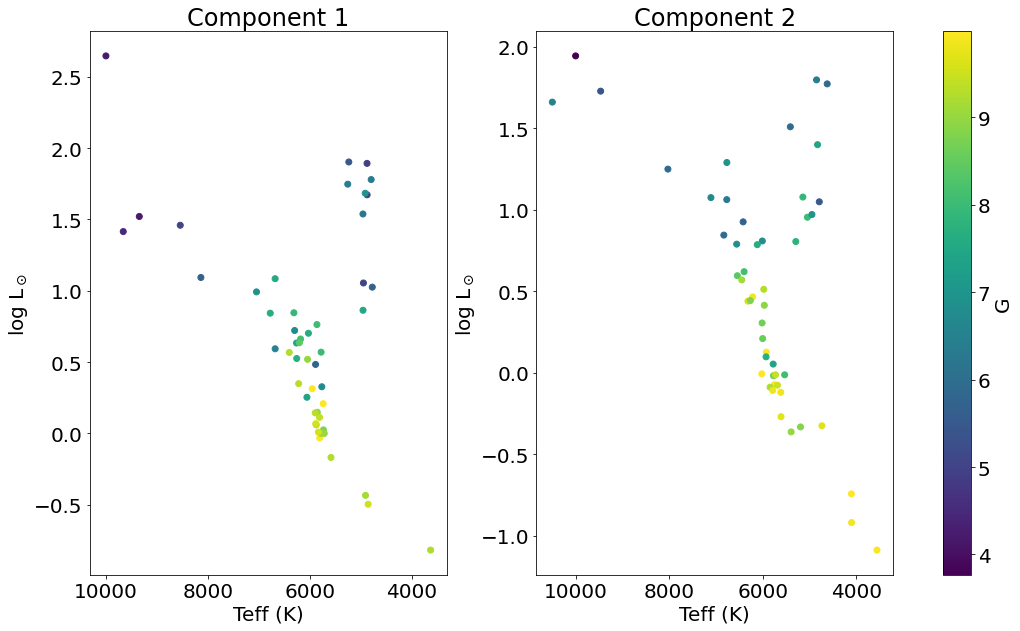

In [36]:
# Plotting HR diagrams for the final selection.

# Set up the grid for the subplots
gs = gridspec.GridSpec(1, 2, wspace=0.25)
fig = plt.figure(figsize=(18,10))

# Plot HR diagram for Component 1
ax1 = fig.add_subplot(gs[0, 0])
sc = ax1.scatter(final_selection.Teff_1,np.log10(final_selection.lum1),c=final_selection.Gmag,
                 vmin=min(min(final_selection.Gmag),min(final_selection.Gmag2)),
                 vmax=min(max(final_selection.Gmag),max(final_selection.Gmag2)))
ax1.invert_xaxis()
plt.xlabel('Teff (K)')
plt.ylabel('log L$_\odot$')
plt.title('Component 1')

# Plot HR diagram for Component 2
ax2 = fig.add_subplot(gs[0, 1])
sc = ax2.scatter(final_selection.Teff_2,np.log10(final_selection.lum2),c=final_selection.Gmag2,
                vmin=min(min(final_selection.Gmag),min(final_selection.Gmag2)),
                vmax=min(max(final_selection.Gmag),max(final_selection.Gmag2)))
ax2.invert_xaxis()
plt.xlabel('Teff (K)')
plt.ylabel('log L$_\odot$')
plt.title('Component 2')

# Add a colorbar shared between the subplots
cbar = plt.colorbar(sc,ax=[ax1,ax2])
cbar.set_label('G')

plt.show()

In [37]:
# Saving the final selection as a file
final_selection.to_csv('final_selection_bin.csv')